### 데이터 분석
diff_percentage = (upbit_price / binance_price -1) *100

In [98]:
import pandas as pd
df_krw = pd.read_csv('DATA/btc_diff_percentage_2023.csv').drop(columns='Unnamed: 0')
df_krw['Open time']=pd.to_datetime(df_krw['Open time'])

In [99]:
# 결측치 확인 (바이낸스 점검으로 결측값이 존재)
df_krw.isna().sum()

Open time           0
Upbit               0
Binance            16
diff               16
diff_percentage    16
dtype: int64

In [100]:
df_krw = df_krw.dropna(subset=['Binance'], ignore_index=True) # 2023년 거래 일시중지로 인한 결측값 제거
df_krw

,Open time,Upbit,Binance,diff,diff_percentage
0,2023-01-01 00:00:00,21064000.0,2.095529e+07,108712.926,0.518785
1,2023-01-01 00:05:00,21040000.0,2.094425e+07,95751.109,0.457171
2,2023-01-01 00:10:00,21012000.0,2.093667e+07,75329.563,0.359797
3,2023-01-01 00:15:00,21010000.0,2.095473e+07,55270.538,0.263762
4,2023-01-01 00:20:00,21048000.0,2.095549e+07,92510.158,0.441460
...,...,...,...,...,...
105099,2023-12-31 23:35:00,57070000.0,5.445278e+07,2617219.660,4.806402
105100,2023-12-31 23:40:00,57072000.0,5.446566e+07,2606338.554,4.785288
105101,2023-12-31 23:45:00,57080000.0,5.450272e+07,2577281.198,4.728720
105102,2023-12-31 23:50:00,57018000.0,5.444118e+07,2576824.260,4.733227


In [101]:
df_krw.describe()

,Open time,Upbit,Binance,diff,diff_percentage
count,105104,1.051040e+05,1.051040e+05,1.051040e+05,105104.000000
mean,2023-07-02 12:17:31.755404032,3.834329e+07,3.766799e+07,6.753042e+05,1.673043
min,2023-01-01 00:00:00,2.101000e+07,2.092221e+07,-1.779489e+06,-3.866144
25%,2023-04-02 06:58:45,3.503700e+07,3.422620e+07,2.549964e+05,0.732531
50%,2023-07-02 12:37:30,3.712200e+07,3.669494e+07,5.412912e+05,1.523371
75%,2023-10-01 18:16:15,3.999900e+07,3.960743e+07,8.626239e+05,2.477708
max,2023-12-31 23:55:00,6.125600e+07,5.902416e+07,3.916793e+06,10.207584
std,NaN,8.322450e+06,7.882586e+06,6.671152e+05,1.317540


### 데이터 시각화

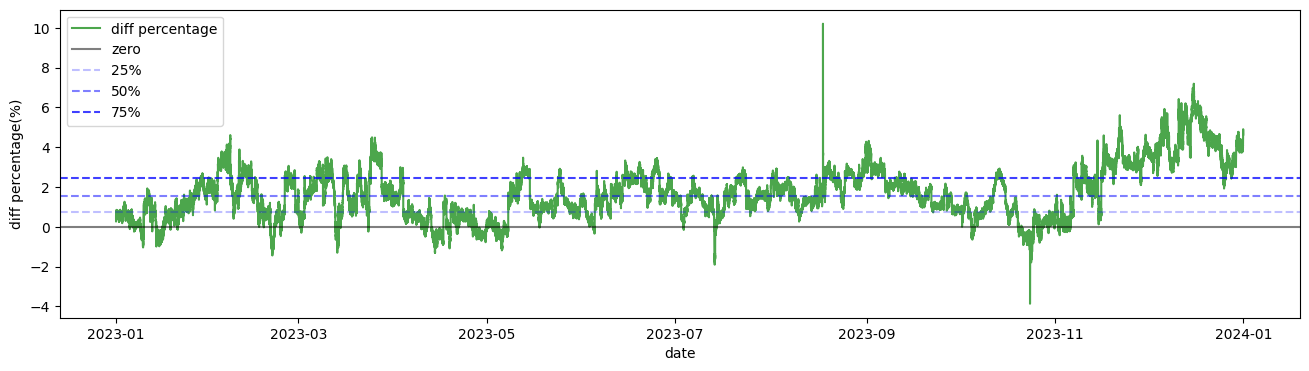

In [102]:
import matplotlib.pyplot as plt
plt.figure(figsize=(16, 4))
# plt.ticklabel_format(axis='y',useOffset=False, style='plain')
plt.plot(df_krw['Open time'], df_krw['diff_percentage'], color='green', alpha =0.7, label = 'diff percentage' )
plt.axhline(y=0, color='black', linewidth=1.5, alpha =0.5, label= 'zero')  # 빨간색 점선, 두께 1.5
plt.axhline(y=df_krw['diff_percentage'].quantile(.25), color='b', linestyle='--', linewidth=1.5, alpha =0.25, label='25%')  # 빨간색 점선, 두께 1.5
plt.axhline(y=df_krw['diff_percentage'].quantile(.50), color='b', linestyle='--', linewidth=1.5, alpha =0.5, label='50%')  # 빨간색 점선, 두께 1.5
plt.axhline(y=df_krw['diff_percentage'].quantile(.75), color='b', linestyle='--', linewidth=1.5, alpha =0.75, label='75%')  # 빨간색 점선, 두께 1.5

plt.legend()
plt.ylabel("diff percentage(%)")
plt.xlabel("date")
plt.show()

In [103]:
len(df_krw.loc[df_krw['diff_percentage']>=0])/len(df_krw)

0.9194987821586238

상당 기간 업비트의 시세가 바이낸스의 시세보다 높다고 할 수 있으며 그 기간의 비율은 약 0.9195입니다. 

### 업비트와 바이낸스 BTC 가격 차이 통계 검정
업비트의 1일봉 가격이 바이낸스보다 높다는 가설을 통계검정을 해보았습니다.

In [104]:
specific_time = '00:00:00'
df_day = df_krw[df_krw['Open time'].dt.strftime('%H:%M:%S') == specific_time].reset_index().drop(columns='index')

In [105]:
#정규성 검정
stats.anderson(df_day['diff_percentage'])

AndersonResult(statistic=2.052434262356485, critical_values=array([0.57 , 0.649, 0.779, 0.908, 1.08 ]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]), fit_result=  params: FitParams(loc=1.6629022973289833, scale=1.3399796535193036)
 success: True
 message: '`anderson` successfully fit the distribution to the data.')

In [106]:
# 정규성 불만족 -> 윌콕슨 검정
# 대립가설 -> 업비트의 가격이 바이낸스보다 크다, 유의수준 0.05
stats.wilcoxon(df_day['diff_percentage'], alternative='greater')

WilcoxonResult(statistic=65281.0, pvalue=1.4110906758507555e-56)

### 시세 차이를 이용한 매매

윌콕슨 가설검정을 통해 업비트의 가격이 바이낸스보다 크다는 것이 확인 되었습니다.

이 시세 차이를 이용해 업비트와 바이낸스 가격 차이를 이용한 매매를 해봅시다.

업비트에서 비트코인 시세가 바이낸스에서보다 높다면 바이낸스에서 비트코인을 사서 업비트로 옮긴 다음 매도할 수 있습니다.

반대로 바이낸스에서 시세가 업비트에서보다 높다면 업비트에서 비트코인을 사서 바이낸스로 옮긴 다음 매도할 수 있습니다.

예를 들어 김프가 +5%고 바이낸스의 가격이 1억원이면 diff_percentage = (upbit_price / binance_price -1) *100 식에 따라 0.05 = upbit_price/1억원 -1 

upbit_price = 1.05억원 입니다. 즉 1BTC를 옮겨 팔면 500만원을 벌 수 있습니다.

하지만 매매 수수료와 출금 수수료를 고려해야합니다.

업비트의 1회 매매 수수료는 0.05%원이고 바이낸스의 매매 수수료는 0.1%원입니다.

업비트의 출금 수수료는 0.0008BTC, 바이낸스는 0.0005BTC입니다.

즉 1회 송금은 0.0013BTC의 수수료가 소모됩니다.

In [108]:
df_day

,Open time,Upbit,Binance,diff,diff_percentage
0,2023-01-01,21064000.0,2.095529e+07,108712.926,0.518785
1,2023-01-02,21127000.0,2.106282e+07,64182.521,0.304720
2,2023-01-03,21205000.0,2.114868e+07,56319.834,0.266304
3,2023-01-04,21379000.0,2.120422e+07,174784.893,0.824293
4,2023-01-05,21606000.0,2.148852e+07,117477.063,0.546697
...,...,...,...,...,...
360,2023-12-27,57001000.0,5.509339e+07,1907606.152,3.462495
361,2023-12-28,57924000.0,5.619840e+07,1725604.736,3.070559
362,2023-12-29,56920000.0,5.496296e+07,1957042.762,3.560658
363,2023-12-30,56361000.0,5.421670e+07,2144295.906,3.955047


In [109]:
df_day.loc[1, 'diff_percentage']

0.3047195422169579

In [133]:
# revp(역프) 때 원화 -> BTC 
# kimp(김프) 때 BTC -> 원화 
won_upbit = 100000000
btc_binance = 0
kimp = 2
revp = 0
cnt=0
in_sign = False
out_sign = True
upbit_send_fee = 0.0008
upbit_trade_fee = 0.0005
binance_send_fee = 0.0005

for i in range(len(df_day)):
    if df_day.loc[i,'diff_percentage']<=revp:
        if out_sign:
            btc_binance = won_upbit * ( 1 - upbit_trade_fee) / df_day.loc[i, 'Upbit'] - upbit_send_fee
            print('btc_binance=',btc_binance)
            out_sign = False
            in_sign = True
        else:
            continue
    
    elif df_day.loc[i,'diff_percentage']>kimp:
        if in_sign:
            won_upbit = (btc_binance - binance_send_fee) * df_day.loc[i,'Upbit']
            out_sign = True
            in_sign = False
            cnt+=1
            print('won_upbit = ', won_upbit)
        else:
            continue
    else:
        continue
print('최종 잔액')
if won_upbit == 0:
    print(btc_binance, 'btc')
else: print(won_upbit, '원')

btc_binance= 3.8774399503336956
won_upbit =  112233534.62221014
btc_binance= 3.552491664710138
won_upbit =  109490143.06469
btc_binance= 3.518588904748598
won_upbit =  105581366.12041017
btc_binance= 2.7058937374923047
won_upbit =  98492564.40714484
btc_binance= 2.4591759639397592
won_upbit =  94853260.01283197
btc_binance= 2.521369607673137
won_upbit =  92644478.95159546
btc_binance= 2.3013196010272647
won_upbit =  107627739.29685338
최종 잔액
107627739.29685338 원


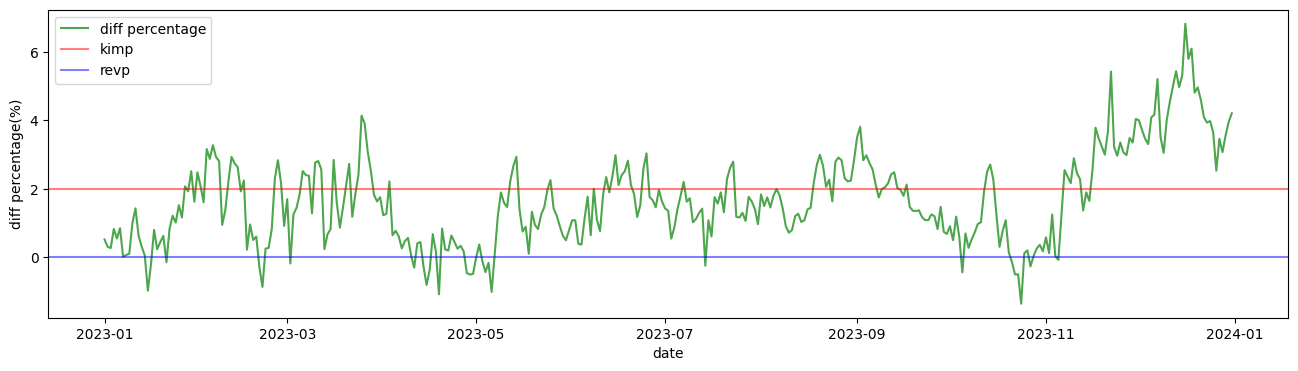

In [119]:
import matplotlib.pyplot as plt
plt.figure(figsize=(16, 4))
# plt.ticklabel_format(axis='y',useOffset=False, style='plain')
plt.plot(df_day['Open time'], df_day['diff_percentage'], color='green', alpha =0.7, label = 'diff percentage' )
plt.axhline(y=kimp, color='r', linewidth=1.5, alpha =0.5, label= 'kimp')  
plt.axhline(y=revp, color='b', linewidth=1.5, alpha =0.5, label= 'revp')  

plt.legend()
plt.ylabel("diff percentage(%)")
plt.xlabel("date")
plt.show()

revp 일 때 사서 kimp일 때 팔면 항상 수익이 나야되는데 그렇지 않습니다. 

그 이유는 살 때와 팔 때 시점의 가격변동 때문입니다.

가격변동 리스크를 해결하기 위해 바이낸스 선물거래를 이용할 수 있습니다. 

In [144]:
# revp(역프) 때 원화 -> BTC 
# kimp(김프) 때 BTC -> 원화 
won_upbit = 50000000
won_binance = 50000000
btc_upbit = 0
short_binance_sell = 0
short_binance_btc = 0
upbit_trade_fee = 0.0005
binance_trade_fee = 0.0005
kimp = 2
revp = 0
cnt=0
buy_sign = True
sell_sign = False

for i in range(len(df_day)):
    if df_day.loc[i,'diff_percentage']<=revp:
        if buy_sign:
            btc_upbit = won_upbit*0.9995/df_day.loc[i,'Upbit']
            print('btc_upbit=',btc_upbit)
            
            short_binance = df_day.loc[i, 'Binance']
            print('short_binance=',short_binance)

            buy_sign = False
            sell_sign = True
        else:
            continue
    
    elif df_day.loc[i,'diff_percentage']>kimp:
        if sell_sign:
            won_upbit = (btc_upbit) * df_day.loc[i,'Upbit'] * 0.9995
            print('won_upbit = ', won_upbit)

            won_binance = (short_binance +df_day['Binance'] - short_binance )
            print('won_binance=', won_binance)

            buy_sign = True
            sell_sign = False
            cnt+=1
        else:
            continue
    else:
        continue
    
print('최종 잔액')
print(won_upbit, '원')
print(won_binance, '원')

btc_upbit= 1.9391199751668478
short_binance= 26026876.064
won_upbit =  56107516.36902452
won_binance= 0      2.095529e+07
1      2.106282e+07
2      2.114868e+07
3      2.120422e+07
4      2.148852e+07
           ...     
360    5.509339e+07
361    5.619840e+07
362    5.496296e+07
363    5.421670e+07
364    5.442057e+07
Name: Binance, Length: 365, dtype: float64
btc_upbit= 1.7763529493455816
short_binance= 31659727.36
won_upbit =  54728701.62374577
won_binance= 0      2.095529e+07
1      2.106282e+07
2      2.114868e+07
3      2.120422e+07
4      2.148852e+07
           ...     
360    5.509339e+07
361    5.619840e+07
362    5.496296e+07
363    5.421670e+07
364    5.442057e+07
Name: Binance, Length: 365, dtype: float64
btc_upbit= 1.7591682673398907
short_binance= 31152591.392
won_upbit =  52768001.67170189
won_binance= 0      2.095529e+07
1      2.106282e+07
2      2.114868e+07
3      2.120422e+07
4      2.148852e+07
           ...     
360    5.509339e+07
361    5.619840e+07
362    5.